<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure:

### Load, Clean and Preprocess Data


<div style="color:#00BFFF">

---

##### **Introduction: Uncovering Reliable Proxies for Consumer Spending Behaviour**


<div style="color:#FF7F50">

**1.1. Introduction: The Problem (Why)**

</div>

The current quarterly GDP reports lag in reflecting the dynamic changes in the economy, impacting decision-makers who rely on timely economic data. This project is devised to mitigate this issue by identifying high-frequency, readily updated data proxies that offer quicker insights into consumer expenditure patterns.

<div style="color:#FF7F50">

**1.2. Project Scope and Objectives (What)**

</div>
The project's primary objective is to systematically identify, harmonise, and validate high-frequency data sources as proxies for real-time tracking of consumer expenditure in the United States. The goal is to refine these proxies to provide more immediate data on consumer spending habits, thus bridging the gap caused by the delayed reporting of official GDP figures.

**Key Questions:**

- Which high-frequency data sources can serve as accurate proxies for consumer spending?
- How can we validate these proxies against established measures of consumer expenditure?
- What techniques can we employ to ensure these proxies offer immediate and reliable insights into current consumer spending trends?
- How will we address potential discrepancies between different data sources in terms of scale, units, or reporting standards?
- Are there any unforeseen challenges in harmonizing data frequencies (monthly vs. quarterly) that could impact the accuracy of our analysis?
- How can we ensure the economic relevance of our findings, beyond statistical correlations?
- What contingency plans do we have for dealing with data anomalies or irregularities that might skew our analysis?

<div style="color:#FF7F50">

**1.3. Methodology**

</div>
We used three notebooks to run the full analysis. `[1]M1_clean_andPreprocess.ipynb`, `[2]M1_Exploratory_Data_Analysis.ipynb`, `[3]M1_Analysis_for_Model_fitting.ipynb`. 

The methodology is designed to focus on data preparation and validation:

- **Clean and Preprocess Data**: This section is load, clean and preprocess the data into a single data fram ensuring data integrity for analytical steps to follow.
- **Exploratory Data Analysis (EDA)**: To understand the characteristics and quality of the high-frequency monthly indicators and their initial relationships to consumer spending.
- **Proxy Validation**: To establish a correlation with established measures of consumer spending through statistical analysis, ensuring that the proxies are reliable and relevant.

<div style="color:#FF7F50">

**1.4. Assumptions**

</div>

**Data Quality and Relevance:** We operate under the assumption that the high-frequency data from FRED and other sources accurately reflect current economic trends and consumer sentiments. However, there is an inherent risk of data bias or inaccuracy, which could impact the reliability of our findings.

**Predictive Power and Relevance:** While we aim to identify effective proxies for consumer expenditure, there's a risk that these proxies may not fully capture the complexities of consumer behaviour or may not adapt swiftly to sudden economic shifts.

**External Factors:** The project also assumes a stable economic environment. Sudden external shocks (like global events or policy changes) could significantly affect consumer behaviour, potentially reducing the predictive accuracy of our proxies.


<div style="color:#00BFFF">

---

##### About the Data


<div style="color:#FF7F50">

**Primary Dataset Description**

</div>

**Short Description:** The primary dataset is "Table 1.1.5. Gross Domestic Product" from the U.S. Bureau of Economic Analysis. It comprises seasonally adjusted quarterly U.S. Gross Domestic Product (GDP) rates in billions of dollars.

**Relevance:** The dataset's detailed information on U.S. GDP over several years is integral to the project's goal of nowcasting consumption. The data's granularity and time-series nature will allow for comprehensive analysis and identification of trends, making it pivotal for the project's success.

**Data frequency:** The data reflecting the economic output of the United States is crucial for analyzing economic trends and growth patterns. The presentation of data is done quarterly by the GDP component.

**Location:** Available at [U.S. Bureau of Economic Analysis](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==). ([BEA](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==))

**Format:** CSV

**Access Method:** The dataset is readily available and can be easily accessed and downloaded directly from the U.S. Bureau of Economic Analysis website.


<div style="color:#FF7F50">

**Secondary Datasets**

</div>

**Federal Reserve Economic Data (FRED)**

**Short Description:** This dataset is sourced from the Federal Reserve Bank of St. Louis's FRED macroeconomic database. It contains a variety of economic data points available at monthly intervals, with a particular focus on US GDP data. The data covers consumer spending indicators, a crucial component of the Gross Domestic Product (GDP).

**Relevance**: Complements the primary dataset with additional economic indicators, useful for cross-referencing and correlation analysis.

**Data frequency:** The monthly frequency of this dataset provides a more detailed temporal resolution than the primary dataset, which may reveal more immediate economic trends. This granularity will be useful in identifying more immediate proxies for nowcasting.

**Estimated Size**: 0.6MB

**Location**: https://research.stlouisfed.org/econ/mccracken/fred-databases/

**Format**: CSV.

**Access Method**: Direct download.


<div style="color:#00BFFF">

---

##### Setup Environment and import libraries


<div style="color:#FF7F50">

**Environment Setup Instructions**

</div>

To ensure a smooth experience running these notebooks, please follow the steps below to set up your environment. These instructions are tailored for users intending to download the folder and run the notebooks locally.

**Step 1: Download the Notebook Folder**

Begin by downloading the folder containing the notebooks you wish to run. Save it to a convenient location on your computer.

**Step 2: Create and Activate a Virtual Environment**

A virtual environment is crucial for managing the dependencies required by different projects separately. To create and activate a virtual environment, follow these steps:

1. Open your terminal or command prompt.
2. Navigate to the directory where you've downloaded the notebook folder.
3. Run the following command to create a virtual environment named `myenv`:
   - `python -m venv myenv`
   - macOS: `source myenv/bin/activate`
   - windows: `myenv\Scripts\activate`
4. With your virtual environment activated, install the required Python packages by running:
    `pip install --upgrade pip`
    `pip install -r requirements.txt`
    `pip install jupyter`

<div style="color:#FF7F50">

**Implementation Method**

</div>


To enhance the clarity and organization of this Jupyter Notebook, we've modularized the codebase. Specifically:

- Complex function and visualization scripts are stored in the `utils` directory. This organization helps keep the notebook streamlined, focusing on analysis and insights.
- Visualization-related code is specifically located within the `visualisations` folder, accessible via a `plot_X_visualisation.py` file.

**Quick Import Example:**

To integrate our modular visualization functions seamlessly, you can import them as shown below:

```python
from visualisation.plot_chart import plot_chart

plot_chart(data)
```

**Advantages of Modularization:**

This modular approach offers several benefits:

- **Improved Organization:** Separates complex scripts from the notebook, making both the codebase and notebook easier to navigate and maintain.
- **Reusability:** Encourages the reuse of visualization tools across projects, streamlining development and ensuring visual consistency.
- **Better Collaboration:** Facilitates teamwork by providing a common repository of tools and functions, simplifying collaboration.

By adopting this structure, we aim to keep the notebook focused and user-friendly while maintaining a robust and adaptable codebase.

In [1]:
# ------- Standard Library Imports -------
import warnings
from pprint import pprint

# from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Remove warnings
warnings.filterwarnings("ignore")

# Set the display options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_86921/2344078838.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="color:#00BFFF">

---

##### Load and preprocesses BEA Dataset


In [2]:
file_path = "./data/bea/bea_usgdp.csv"

In [3]:
def load_and_preprocess_gdp_data(file_path):
    """
    Loads and preprocesses the GDP data from a CSV file.
    Args:file_path (str): The path to the CSV file containing GDP data.
    Returns:pandas.DataFrame: Preprocessed GDP data.
    """

    # Load the data with specified rows to skip and number of rows to read
    pce_df = pd.read_csv(file_path, skiprows=3, nrows=28)

    # Drop the first column (unnecessary or identifier column)
    pce_df.drop(pce_df.columns[0], axis=1, inplace=True)

    # Rename the first column as 'description'
    pce_df.rename(columns={pce_df.columns[0]: "description"}, inplace=True)

    # Remove any characters after (and including) the "." in column names
    pce_df.columns = pce_df.columns.str.replace(r"\..*", "", regex=True)

    # Concatenate the column names with the first row values, handling NaNs
    pce_df.columns = pce_df.columns + " " + pce_df.iloc[0].fillna("")

    # Drop the first row as it's now part of the column names
    pce_df.drop(pce_df.index[0], inplace=True)

    # Reset the index of the DataFrame
    pce_df.reset_index(drop=True, inplace=True)

    # Correct any trailing space issues in the 'description' column name
    pce_df.rename(columns=lambda x: x.strip(), inplace=True)

    return pce_df


In [4]:


def create_structured_description(pce_df):
    """
    Process a DataFrame to create a structured description column.
    This function takes a DataFrame with a 'description' column and adds structure to it
    based on indentation levels, indicating hierarchical relationships.
    """

    # Function to determine the indentation level (number of leading spaces)
    def indentation_level(s):
        """Return the number of leading spaces in a string, indicating the indentation level."""
        return len(s) - len(s.lstrip())

    # Apply the function to find indentation levels
    pce_df["indentation"] = pce_df["description"].apply(indentation_level)

    # Initialize an empty list to store the new structured names
    structured_names = []
    current_parent = ""
    current_subparent = ""

    # Iterate through the DataFrame to construct the hierarchical names
    for index, row in pce_df.iterrows():
        if row["indentation"] == 0:
            name = row["description"].strip()
            current_parent = name
        elif row["indentation"] == 4:
            name = f"{current_parent} : {row['description'].strip()}"
            current_subparent = row["description"].strip()
        elif row["indentation"] == 8:
            name = (
                f"{current_parent} : {current_subparent} : {row['description'].strip()}"
            )
        else:
            name = row["description"].strip()

        structured_names.append(name)

    # Assigning the structured names to the 'description' column
    pce_df["description"] = structured_names

    # Dropping the 'indentation' column as it's no longer needed
    pce_df.drop("indentation", axis=1, inplace=True)
    
    # Use regex to remove leading and trailing ":", " ", or combinations thereof
    pce_df["description"] = pce_df["description"].str.replace(r'^[:\s]+|[:\s]+$', '', regex=True)

    return pce_df

In [5]:
# Load and preprocess the data
pce_df = load_and_preprocess_gdp_data(file_path)

# create hierarchy for PCE data
pce_df = create_structured_description(pce_df)

In [6]:
pce_df.description.unique()

array(['Gross domestic product', 'Personal consumption expenditures',
       'Personal consumption expenditures : Goods',
       'Personal consumption expenditures : Goods : Durable goods',
       'Personal consumption expenditures : Goods : Nondurable goods',
       'Personal consumption expenditures : Services',
       'Gross private domestic investment',
       'Gross private domestic investment : Fixed investment',
       'Gross private domestic investment : Fixed investment : Nonresidential',
       'Structures', 'Equipment', 'Intellectual property products',
       'Gross private domestic investment : Fixed investment : Residential',
       'Gross private domestic investment : Change in private inventories',
       'Net exports of goods and services',
       'Net exports of goods and services : Exports',
       'Net exports of goods and services : Exports : Goods',
       'Net exports of goods and services : Exports : Services',
       'Net exports of goods and services : Imports

In [7]:
# extract only "Personal consumption expenditures"
pce_df = pce_df[pce_df.description == "Personal consumption expenditures"]

# rename "Personal consumption expenditures" to "PCE"
pce_df["description"] = pce_df["description"].str.replace(
    "Personal consumption expenditures", "PCE"
)

In [8]:
def transform_date_formats(pce_df):
    # Step 1: Extract only non-date columns
    non_date_columns = pce_df.columns[:1]

    # Step 2: Extract and transform date columns
    date_columns = pce_df.columns[1:]  # Non-Date columns start from the 2nd column

    # Function to convert quarter to the format 'YYYYQX'
    def quarter_to_yyyyqx(q):
        year, quarter = q.split(" Q")
        return f"{year}Q{quarter}"

    # Apply this function to each of the date columns
    transformed_date_columns = [quarter_to_yyyyqx(col) for col in date_columns]

    # Step 3: Combine the columns back together
    pce_df.columns = list(non_date_columns) + transformed_date_columns

    # Transpose the dataset for easier manipulation (columns become rows)
    pce_df = pce_df.set_index("description").transpose()

    # Convert all columns to numeric
    for col in pce_df.columns:
        pce_df[col] = pd.to_numeric(pce_df[col], errors="coerce")

    return pce_df


# Transform the date formats
pce_df = transform_date_formats(pce_df)

In [9]:
#show head and tail 5 rows
print(pce_df.head(5))
print(pce_df.tail(5))

description    PCE
1947Q1       156.2
1947Q2       160.0
1947Q3       163.5
1947Q4       167.7
1948Q1       170.4
description      PCE
2022Q4       17917.0
2023Q1       18269.6
2023Q2       18419.0
2023Q3       18679.5
2023Q4       18888.1


In [10]:
# save the data
pce_df.to_csv("./results/bea/bea_pce_original.csv", index=True)

This section focuses on loading the Personal Consumption Expenditures (PCE) data sourced from the Bureau of Economic Analysis (BEA). Our objective is to preprocess and analyze the data to uncover insights into trends in personal consumption within the United States.

<div style="color:#FF7F50">

**Data Source**

</div>

The PCE data is retrieved from a CSV file provided by the BEA:

- **File Path:** `./data/bea/bea_usgdp.csv`

<div style="color:#FF7F50">

**Data Preparation and Preprocessing**

</div>

To ensure the data's quality and usability for analysis, we perform several preprocessing steps using custom utilities from the `utils.bea_load_data` module. These steps include:

1. **Loading and Preprocessing the Data**: The initial step involves loading the GDP data and applying preliminary preprocessing to clean and structure the dataset for analysis.

2. **Creating a Hierarchy for PCE Data**: To better understand the data, we create a hierarchical structure for GDP components and subcomponents that categorizes the information, making it easier to navigate and analyze.

3. **Creating Short Descriptions for PCE Data**: Short descriptions are generated for each data point to provide concise summaries, enhancing readability and understanding.

4. **Extracting PCE Data**: We focus our analysis specifically on PCE data by filtering the dataset to include only entries with 'PCE' in their short descriptions.

5. **Transforming Date Formats**: The date formats are standardized to facilitate time series analysis and ensure consistency across the dataset.

6. **Saving the Processed Data**: After preprocessing, the refined PCE dataset is saved to a CSV file for further analysis or reporting:


<div style="color:#00BFFF">

---

##### Statistical Analysis and Visualization of PCE Data


The goal of this section is to inspect the Personal Consumption Expenditures (PCE) data to understand its distribution, identify outliers, and analyze its trend over time. This involves calculating the median, interquartile range (IQR), detecting outliers, and examining the rate of change across different periods.

<div style="color:#FF7F50">

**Rate of Change**:

</div>

To analyze trends, the rate of change is a crucial metric. It is calculated using the formula:

$$
\text{Rate of Change} = \left( \frac{\text{Current Value} - \text{Previous Value}}{\text{Previous Value}} \right) \times 100\%
$$

This calculation is efficiently performed using the `pct_change()` function in pandas, followed by multiplying the result by 100 to express it as a percentage.

<div style="color:#FF7F50">

**Plotting the Data**

</div>
For a comprehensive analysis, we plot the data focusing on the extended range, IQR, and outliers. A custom function `analyze_and_plot` is defined to standardize datetime indices, compute relevant statistics, and visualize the results.

The `analyze_and_plot` function is stored in a subfolder `utils/visualisation` for better organization. It is then imported and executed by importing the file `from utils.visualisation import analyze_and_plot` and calling it with `analyze_and_plot(pce_df, 'PCE')`

<div style="color:#FF7F50">

**Function Overview**

</div>
This function includes steps to standardize the datetime index, accommodating different date formats and ensuring consistency for time series analysis. It is designed to handle quarterly data and convert it to a standard datetime format for ease of analysis.


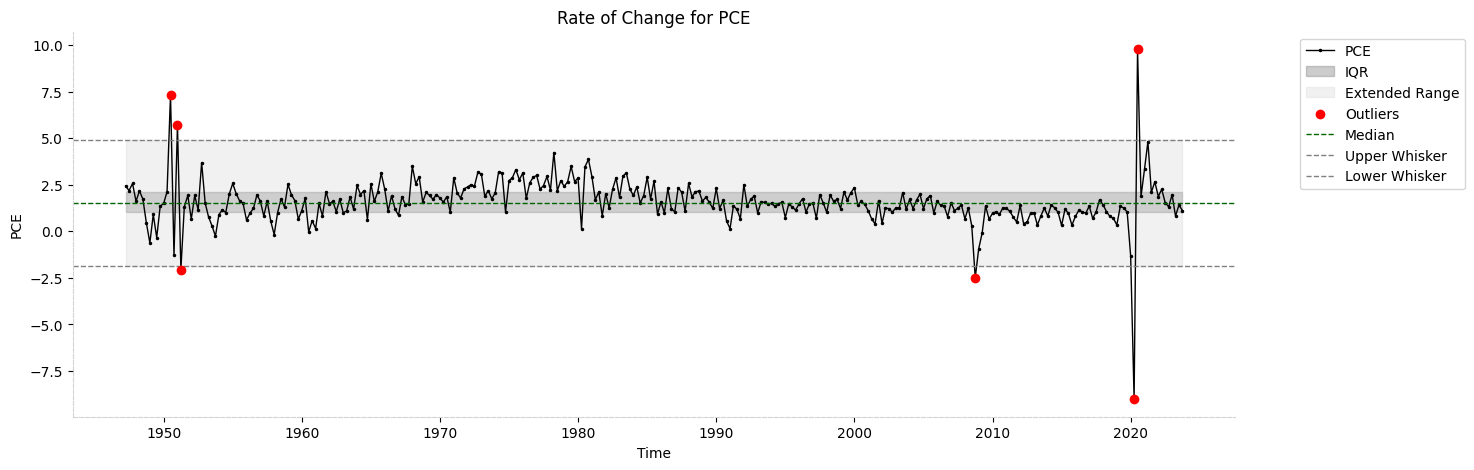

In [11]:
from visualisations.analyze_and_plot import analyze_and_plot

# Call the function from utils/visualisations and store the result in result
analyze_and_plot(pce_df, "PCE")

<div style="color:#FF7F50">

**Implementation**

</div>

By executing the above steps, we gain valuable insights into the PCE data's behavior over time, its variability, and any potential outliers that may influence further analysis.

Our analysis of Personal Consumption Expenditures (PCE) data reveals notable periods of outliers and volatility, alongside consistent trends within the Interquartile Range (IQR) from 1950 to the present. These observations offer insights into consumer spending behavior under varying economic conditions:

- **1950s:** The post-World War II economic boom led to a significant rise in consumer spending, with PCE outliers reflecting the era’s prosperity and confidence.
- **1980:** Economic policies to combat the early 1980s recession caused fluctuations in PCE, mirroring the impacts of high inflation and unemployment on consumer spending.
- **2008:** The financial crisis resulted in a sharp PCE decline, highlighting the effect of economic downturns on consumer confidence and expenditure.
- **COVID-19 Pandemic:** The pandemic's onset disrupted PCE patterns drastically, with immediate impacts from lockdowns and shifts in consumer priorities.

Outside these periods, the PCE line graph generally remains within the IQR, indicating relative stability in consumer spending amidst the evolving economic landscape. This stability, punctuated by periods of significant deviation, underscores the dynamic interplay between consumer behavior and macroeconomic factors.


<div style="color:#00BFFF">

---

##### Loading the FRED data


In this section of the analysis, we are incorporating secondary datasets from the Federal Reserve Economic Data (FRED) to enrich our examination of Personal Consumption Expenditures (PCE). The FRED datasets are pivotal for comparing a wide array of economic variables against PCE, facilitating a comprehensive macroeconomic analysis.

<div style="color:#FF7F50">

**Dataset Overview**

</div>

Federal Reserve Bank of St. Louis's FRED database. The dataset includes 123 monthly economic indicators, focusing on US GDP and consumer spending variables—key components of GDP. This dataset complements our primary PCE data by providing additional economic indicators for a multifaceted analysis. Monthly updates offer detailed insights into short-term economic trends and consumer behavior.

<div style="color:#FF7F50">

**Data Loading Procedure**

</div>

The `load_fredmd_data` function is designed to perform the following actions:

1. **Download Data:** Retrieves the latest version `current` of the FRED-MD dataset based on the specified `vintage`, ensuring our analysis is grounded on the most current data.
2. **Preprocess Data:** Processes the dataset by extracting transformation codes, mapping short names to descriptions, and setting observation dates as the index, which is crucial for time-series analysis.
3. **Save Processed Data:** The preprocessed dataset is then saved for subsequent analysis, with the observation date index facilitating easy access to specific time periods.


In [12]:
def load_fredmd_data(vintage):
    """
    Loads and processes the FRED-MD data.
    """
    # Define the base URL for the FRED-MD dataset
    base_url = "https://files.stlouisfed.org/files/htdocs/fred-md"

    # Load the dataset for the specified 'vintage', dropping rows that are entirely NA
    fred_orig = pd.read_csv(f"{base_url}/monthly/{vintage}.csv")#.dropna(how="all")

    # Drop the first row (containing transformation info) from the dataset
    fred_orig = fred_orig.iloc[1:]

    # Convert 'sasdate' column to a PeriodIndex with monthly frequency for time-series analysis
    fred_orig.index = pd.PeriodIndex(fred_orig.sasdate.tolist(), freq="M")

    # Remove the 'sasdate' column as it's now set as the index
    fred_orig.drop("sasdate", axis=1, inplace=True)

    # Return the processed data and the transformation information
    return fred_orig


# Load data for the current vintage and unpack into original data and transformation info
fred = load_fredmd_data("current")

# Save the original data
fred.to_csv("./results/fred/fred_monthly_orig.csv", index=True)

<div style="color:#FF7F50">

**Implementation**

</div>

After loading the data, we further enhance the dataset's usability by mapping column names to their descriptive titles using the `map_column_names` function. This step significantly improves the readability and interpretability of the data for in-depth analysis.


In [13]:
def map_column_names(df, defn_file):
    """
    Maps FRED-MD column names to their descriptions.

    Parameters:
    - df: DataFrame with FRED-MD data whose column names need to be mapped.
    - defn_file: Path to the CSV file containing column definitions.
    """
    # Load the definitions file
    defn = pd.read_csv(defn_file, encoding_errors="ignore")

    # Initialize an empty dictionary to store the mapping from variable names to descriptions
    map_dict = {}

    # Loop through each column in the DataFrame
    for col in df.columns:
        # If the column exists in the definitions DataFrame, add it to the mapping dictionary
        if col in defn['fred'].values:
            # Find the description corresponding to the column name
            description = defn.loc[defn['fred'] == col, 'description'].values[0]
            map_dict[col] = description

    # Use the mapping dictionary to rename the columns of the DataFrame
    df_renamed = df.rename(columns=map_dict)

    # Return the DataFrame with renamed columns and the definitions DataFrame for reference
    return df_renamed, defn


column_defn_file = "./data/FRED/FRED_Definitions_Mapping/fredmd_definitions.csv"
fred_orig, defn = map_column_names(fred, column_defn_file)
fred_orig.tail(5)

,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IPB51222S,IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,BOGMBASE,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,TWEXAFEGSMTHx,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks,VIXCLSx
2023-08,19098.603,

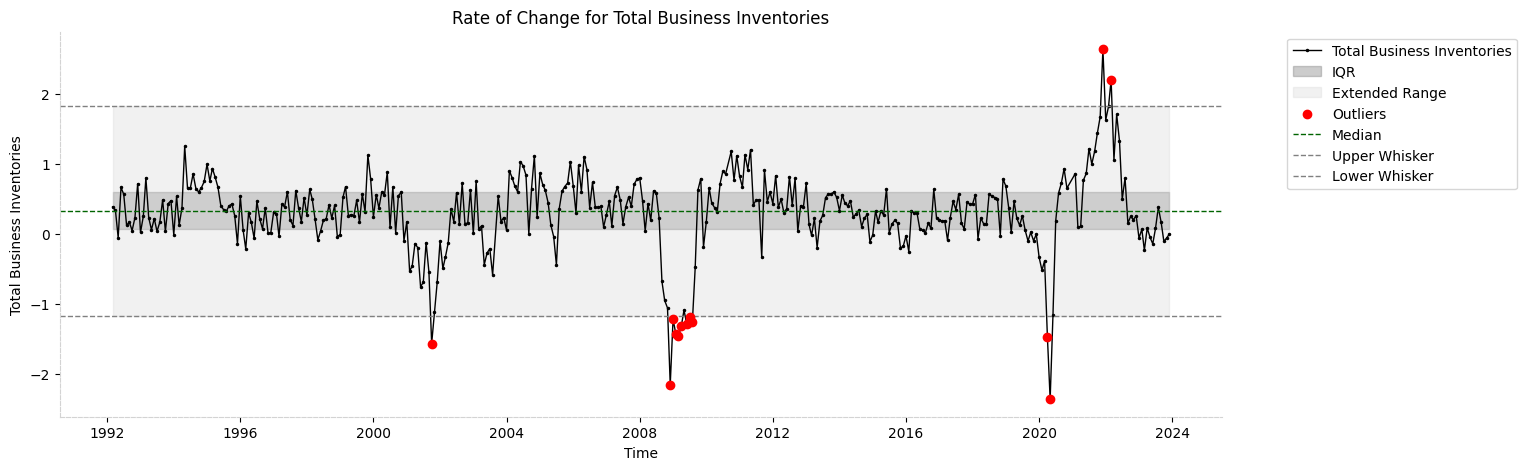

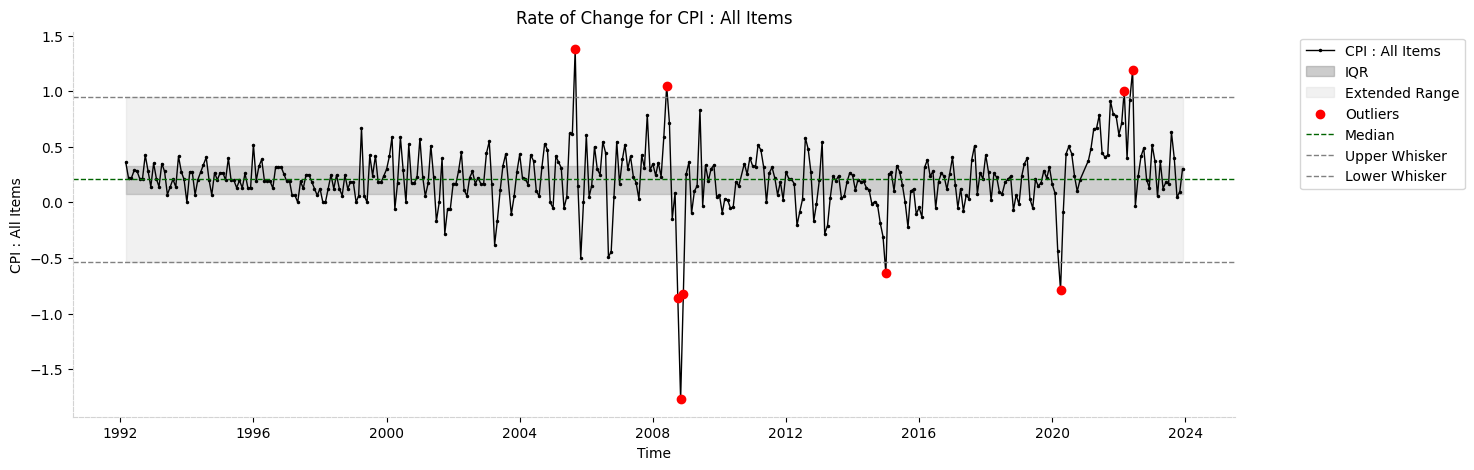

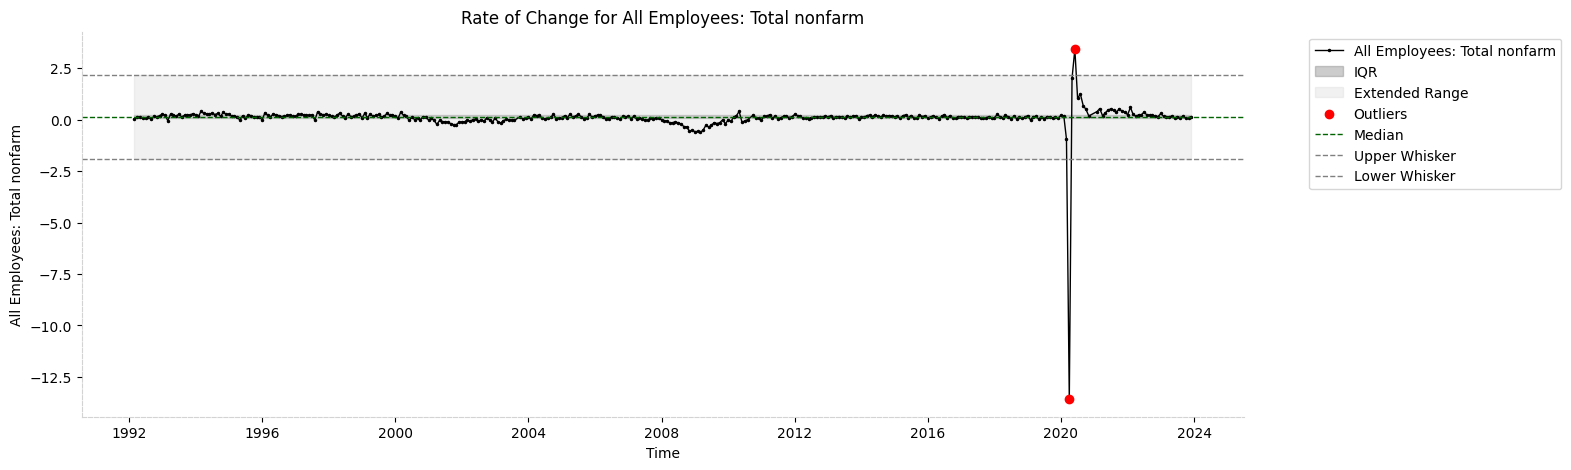

In [14]:
# Analyse and Plot a few indicators to inspect the data using the function from utils/visualisations

analyze_and_plot(fred_orig,'Total Business Inventories')
analyze_and_plot(fred_orig,'CPI : All Items')
analyze_and_plot(fred_orig,'All Employees: Total nonfarm')

<div style="color:#00BFFF">

---

##### Frequency Alignment:


<div style="color:#FF7F50">

**Frequency Alignment for Comparative Analysis**

</div>

After the initial steps of loading, cleaning, and extracting relevant columns from both datasets, the datasets are indexed by different time frequencies. Specifically, the FRED database is organized monthly, while our PCE data from the BEA dataset follows a quarterly format. To bridge this gap, we implement a strategy to align their frequencies, facilitating a coherent and meaningful comparison.

To achieve this alignment, we introduce a function `transform_to_quarterly` that converts monthly dates into the quarterly 'YYYYQX' format. This transformation involves selecting only the last month of each quarter (March, June, September, and December) from the FRED dataset, as these months effectively represent the quarter's economic activity.


In [15]:
# Function to transform monthly date to quarterly date in 'YYYYQX' format
def transform_to_quarterly(date_str):
    year, month = date_str.split("-")
    quarter = (int(month) - 1) // 3 + 1
    return f"{year}Q{quarter}"

We then apply this function to the FRED dataset, filtering for the end months of each quarter and converting the index to the quarterly format. This process not only standardizes the temporal resolution but also creates a new 'Quarter' column, which is then set as the new index.


In [16]:
# Convert index to string to apply string methods
fred_orig.index = fred_orig.index.astype(str)

# Selecting only the last month of each quarter from the monthly dataset
# The last month of each quarter are March (03), June (06), September (09), December (12)
fred_orig_filtered = fred_orig[fred_orig.index.str.endswith(("03", "06", "09", "12"))]

# Transform the index to the quarterly format and create a new 'Quarter' column
fred_orig_filtered["Quarter"] = fred_orig_filtered.index.map(transform_to_quarterly)

# Set the new 'Quarter' column as the index
fred_orig_filtered.set_index("Quarter", inplace=True)

Finally, we compare the date ranges of the transformed FRED dataset and the PCE dataset to ensure they align properly for subsequent analyses.


In [17]:
# Checking the date range of the monthly dataset
monthly_date_range = fred_orig_filtered.index.min(), pce_df.index.max()

# Checking the date range of the PCE dataset
pce_date_range = pce_df.index.min(), pce_df.index.max()

monthly_date_range, pce_date_range

(('1959Q1', '2023Q4'), ('1947Q1', '2023Q4'))

<div style="color:#00BFFF">

---

##### Quarterly Data Integration


- Next We will merge quarterly BEA PCE rate of change data framework with the FRED transformed quarter-over-quarter rate of change into a unified framework using pandas, ensuring seamless integration and compatibility.

- This step is vital for consolidating different economic indicators into a single, comprehensive analysis.


In [18]:
# drop rows in pce_df that are not in fred_orig_filtered
pce_df = pce_df[pce_df.index.isin(fred_orig_filtered.index)]

# Merging the datasets on the 'Quarter' column
joined_dataset = pd.merge(
    pce_df, fred_orig_filtered, left_index=True, right_index=True, how="left"
)

# Display the first few rows of the merged dataset
joined_dataset.head(2)

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IPB51222S,IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,BOGMBASE,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,TWEXAFEGSMTHx,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks,VIXCLSx
1959Q1,309.4,2

In [19]:
#Sanity check for later
index_pretransform = joined_dataset.index[-5:]

<div style="color:#00BFFF">

---

##### Data Integrity Check


<div style="color:#FF7F50">

**Verify Data Consistency with Column Labels**

</div>

- Ensure each column label accurately represents the data it holds.
- Correct any typos or inconsistencies in column names.
- `Caveat`: they will be a logical key on which we will join transformation codes and economic group mappings from the FREDmd_definitions dataframe so if you changes names here, ensure to change it there as well.


In [20]:
# Print column labels
print(joined_dataset.columns)

# To rename columns if necessary
# joined_dataset.rename(columns={'old_name': 'new_name'}, inplace=True)


Index(['PCE', 'Real Personal Income',
       'Real personal income ex transfer receipts',
       'Real personal consumption expenditures',
       'Real Manu. and Trade Industries Sales',
       'Retail and Food Services Sales', 'IP Index',
       'IP: Final Products and Nonindustrial Supplies',
       'IP: Final Products (Market Group)', 'IP: Consumer Goods',
       ...
       'Personal Cons. Exp: Nondurable goods', 'Personal Cons. Exp: Services',
       'Avg Hourly Earnings : Goods-Producing',
       'Avg Hourly Earnings : Construction',
       'Avg Hourly Earnings : Manufacturing', 'Consumer Sentiment Index',
       'Consumer Motor Vehicle Loans Outstanding',
       'Total Consumer Loans and Leases Outstanding',
       'Securities in Bank Credit at All Commercial Banks', 'VIXCLSx'],
      dtype='object', length=128)


<div style="color:#FF7F50">

**Ensure Adherence to Field-specific Rules**

</div>

- Check for adherence to field-specific constraints (e.g., non-negative values for certain economic indicators).


In [21]:
# iterate ofver joined_dataset and check each column,check for negative values in a column
for column in joined_dataset.columns:
    if joined_dataset[column].min() < 0:
        print(f"Column {column} has negative values")

Column Reserves Of Depository Institutions has negative values
Column 3-Month Commercial Paper Minus FEDFUNDS has negative values
Column 3-Month Treasury C Minus FEDFUNDS has negative values
Column 6-Month Treasury C Minus FEDFUNDS has negative values
Column 1-Year Treasury C Minus FEDFUNDS has negative values
Column 5-Year Treasury C Minus FEDFUNDS has negative values
Column 10-Year Treasury C Minus FEDFUNDS has negative values
Column Moody s Aaa Corporate Bond Minus FEDFUNDS has negative values
Column Moody s Baa Corporate Bond Minus FEDFUNDS has negative values


These Economic indicators can exhibit negative values, particularly those representing differences or spreads between two measures. This phenomenon is most common in indicators that calculate the spread between interest rates or yields, such as:

- **Reserves Of Depository Institutions**: Negative values are unusual but may occur due to specific policy conditions or accounting adjustments.
- **Spread-Related Indicators**: Indicators like "3-Month Commercial Paper Minus FEDFUNDS" or "Treasury C Minus FEDFUNDS" show the difference between two rates. Negative values indicate that the first rate is lower than the second, which can happen in periods of economic stress or unusual monetary policy environments.

**Significance**: Negative spreads can signal investor sentiment, expectations about future interest rates, or the health of financial markets. For instance, a negative spread between Treasury securities and the Federal Funds rate might indicate investor expectations of future rate cuts by the Federal Reserve.


In [22]:
#iterate over joined_dataset and check each column, check for infinite values in a column and count them
for column in joined_dataset.columns:
    if not np.isfinite(joined_dataset[column]).all():
        print(f"Column {column} has infinite values")
        #replace infinite values with NaN
        joined_dataset[column].replace([np.inf, -np.inf], np.nan, inplace=True)

Column Real Manu. and Trade Industries Sales has infinite values
Column New Private Housing Permits (SAAR) has infinite values
Column New Private Housing Permits, Northeast (SAAR) has infinite values
Column New Private Housing Permits, Midwest (SAAR) has infinite values
Column New Private Housing Permits, South (SAAR) has infinite values
Column New Private Housing Permits, West (SAAR) has infinite values
Column New Orders for Consumer Goods has infinite values
Column New Orders for Nondefense Capital Goods has infinite values
Column Total Business Inventories has infinite values
Column Total Business: Inventories to Sales Ratio has infinite values
Column Total Nonrevolving Credit has infinite values
Column Nonrevolving consumer credit to Personal Income has infinite values
Column S&P s Composite Common Stock: Dividend Yield has infinite values
Column S&P s Composite Common Stock: Price-Earnings Ratio has infinite values
Column TWEXAFEGSMTHx has infinite values
Column Consumer Sentiment

<div style="color:#FF7F50">

**Duplicate Entries**

</div>

- Evaluate the dataset for duplicate rows and drop duplicates.


In [23]:
# Check for duplicate rows
print(f"Duplicate rows: {joined_dataset.duplicated().sum()}")

# To drop duplicates if necessary
# joined_dataset.drop_duplicates(inplace=True)


Duplicate rows: 0


<div style="color:#FF7F50">

**Ensure Proper Data Types for Each Column**

</div>

- Check and correct data types for numerical, categorical, and datetime columns.


In [24]:
# Check current data types
# print(joined_dataset.dtypes)

# iterate ofver joined_dataset and check each column, Change the data type of a column to float if not already
for column in joined_dataset.columns:
    if joined_dataset[column].dtype != "float64":
        joined_dataset[column] = joined_dataset[column].astype(float)

#sanity check 
for column in joined_dataset.columns:
    if joined_dataset[column].dtype != "float64":
        print(column)


<div style="color:#FF7F50">

**Ensure Each Column in joined_dataset is in Defintions dataframe**

</div>


In [25]:
# Convert defn.description to a list once for efficiency
defn_descriptions = defn.description.to_list()

# Check that each column name is in defn.description
for column in joined_dataset.columns:
    if column not in defn_descriptions:
        print(f"Column {column} not in defn.description")

print('##############################################')

# Check which descriptions are not in the column names
for description in defn.description:
    if description not in joined_dataset.columns:
        print(f"Description {description} not in joined_dataset columns")

# Identify and drop columns that are not in defn.description except "PCE"
columns_to_drop = [column for column in joined_dataset.columns if column not in defn_descriptions and column != "PCE"]
joined_dataset.drop(columns=columns_to_drop, inplace=True)


Column PCE not in defn.description
Column IPB51222S not in defn.description
Column BOGMBASE not in defn.description
Column TWEXAFEGSMTHx not in defn.description
Column VIXCLSx not in defn.description
##############################################
Description IP: Residential Utilities not in joined_dataset columns
Description ISM Manufacturing: Production Index not in joined_dataset columns
Description ISM Manufacturing: Employment Index not in joined_dataset columns
Description ISM : PMI Composite Index not in joined_dataset columns
Description ISM : New Orders Index not in joined_dataset columns
Description ISM : Supplier Deliveries Index not in joined_dataset columns
Description ISM : Inventories Index not in joined_dataset columns
Description St. Louis Adjusted Monetary Base not in joined_dataset columns
Description Trade Weighted U.S. Dollar Index: Major Currencies not in joined_dataset columns
Description ISM Manufacturing: Prices Index not in joined_dataset columns
Description MZ

<div style="color:#00BFFF">

---

##### Filter Date Range


<div style="color:#FF7F50">

**Converting Index to Datetime**

</div>

We use the `convert_index_to_datetime` function. This function checks if the index is already in the pd.Timestamp format, and if not, it converts the format into a datetime object. This conversion process breaks down the index into year and quarter components, calculates the corresponding month, and constructs a proper datetime object.


In [26]:
def convert_index_to_datetime(index):
    """Convert 'YYYYQX' format to the end of the quarter datetime."""
    
    if isinstance(index, pd.Timestamp):
        return index  # Return the input directly if it's already a Timestamp

    year = int(index[:4])
    quarter = int(index[-1])
    # Determine the last month of the quarter
    month = quarter * 3
    # Find the last day of the month
    last_day_of_month = pd.Timestamp(year=year, month=month, day=1).days_in_month

    return pd.Timestamp(year=year, month=month, day=last_day_of_month)


# Ensure the index is in datetime format representing the end of each quarter
joined_dataset.index = joined_dataset.index.map(convert_index_to_datetime)

#sanity check ensure its the last day of each quater

print(index_pretransform.to_list())
print(joined_dataset.index[-5:].to_list())


['2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4']
[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]


<div style="color:#FF7F50">

**Filtering Data for Analysis**

</div>

Once the index is in datetime format, we filter our dataset to include only the observations from the year 1960 onwards. This step narrows down our analysis to a specific period, allowing us to focus on more contemporary trends and patterns.


In [27]:

# Now, filter the data to include only observations from 1960 onwards
joined_dataset = joined_dataset[joined_dataset.index.year >= 1980]

# drop columns reported to not be as reliable according to McCracken, M.W., Ng, S., 2015; FRED-MD: A Monthly Database for Macroeconomic Research, Federal Reserve Bank of St. Louis Working Paper 2015-012. URL https://doi.org/10.20955/wp.2015.012
# drop Help-Wanted Index for United States', 'Ratio of Help Wanted/No. Unemployed'
joined_dataset.drop(
    [
        "Help-Wanted Index for United States",
        "Ratio of Help Wanted/No. Unemployed",
        "S&P s Composite Common Stock: Price-Earnings Ratio", #is released with roughly a 6-month lag
        'Consumer Sentiment Index', #is available only quarterly prior to 1977:11, and recent data are available in FRED with a 1-year lag.
    ],
    axis=1,
    inplace=True,
)

<div style="color:#00BFFF">

---

##### Inspecting and Handling Missing Values


In this section of our notebook, we tackle the critical step of inspecting and handling missing values within our dataset. Dealing with NaNs (Not a Number values) in economic data requires careful consideration due to the potential implications on analysis and interpretation.

<div style="color:#FF7F50">

**Inspecting Missing Values**

</div>

- To start, we utilize the `report_missing_values` function to systematically identify and report columns within our dataset that contain missing values.

- This function calculates the total count of NaNs in each column and prints a summary of those columns where NaNs are present, along with the count of missing values.

- This initial inspection is crucial for understanding the extent and distribution of missing data across our dataset.


In [28]:
# import missingno as msno
# %matplotlib inline
# msno.matrix(joined_dataset)

In [29]:
def report_missing_values(df):
    # Check for NaN values in the dataset
    nan_summary = df.isna().sum()

    # Display columns with NaNs and their count, if any
    columns_with_nans = nan_summary[nan_summary > 0]
    if not columns_with_nans.empty:
        print("\nColumns with NaN values and their count:")
        print(columns_with_nans)
    else:
        print("\nNo NaN values found.")
    return columns_with_nans


missing = report_missing_values(joined_dataset)

# #plot with missingno
# msno.matrix(joined_dataset[missing.index])


Columns with NaN values and their count:
Real Manu. and Trade Industries Sales               1
New Orders for Consumer Goods                      49
Total Business Inventories                          1
Total Business: Inventories to Sales Ratio          1
Total Nonrevolving Credit                           1
Nonrevolving consumer credit to Personal Income     1
S&P s Composite Common Stock: Dividend Yield        2
Consumer Motor Vehicle Loans Outstanding            1
Total Consumer Loans and Leases Outstanding         1
dtype: int64


<div style="color:#FF7F50">

**Handling Missing Values**

</div>

Given the sensitive nature of economic data, where each variable can hold significant analytical value, it's essential to approach the handling of NaNs judiciously.

- Our strategy involves dropping columns that exceed a certain threshold of missing values, which we've set at 30.
- This threshold is chosen based on a balance between retaining as much data as possible and ensuring the reliability of our analysis.

- We can see that New Orders for Consumer Goods, New Orders for Nondefense Capital Goods and Consumer Sentiment Index have passed that threshold and we have decided to drop these.

The `drop_columns_with_many_nans` function implements this strategy.

- It first calculates the total number of NaNs per column, identifies those columns where the count exceeds our threshold, and subsequently drops these columns from the dataset.

- This process helps in maintaining the integrity of our dataset by focusing on more complete datasets, while also acknowledging the reality that some level of missing data is often unavoidable in large economic datasets.


In [30]:
def drop_columns_with_many_nans(df, threshold=30):
    """
    Drops columns from the dataframe that have more than a specified number of NaN values.
    """

    # Calculate the count of NaN values per column
    nan_counts = df.isna().sum()

    # Identify columns that exceed the threshold for NaN values
    columns_to_drop = nan_counts[nan_counts > threshold].index
    columns_to_fill = nan_counts[nan_counts <= 5].index

    # Drop these columns from the dataframe
    df_dropped = df.drop(columns=columns_to_drop)

    ## interpolate the missing values
    df_dropped = df[columns_to_fill].interpolate(method="linear")

    #backwards fill any missing data
    df_dropped = df[columns_to_fill].fillna(method="bfill")

    #forward fill any missing data
    df_dropped = df[columns_to_fill].fillna(method="ffill")

    # print the names of dropped columns for review
    if len(columns_to_drop) > 0:
        print(
            f"Dropped {len(columns_to_drop)} columns with more than {threshold} NaN values:"
        )
        print(columns_to_drop.tolist())
    else:
        print("No columns were dropped based on the threshold criteria.")

    return df_dropped


joined_dataset = drop_columns_with_many_nans(joined_dataset, threshold=30)

Dropped 1 columns with more than 30 NaN values:
['New Orders for Consumer Goods']


<div style="color:#00BFFF">

---

##### Inspect and Handle Outliers


In this section, we identify and handle outliers within our dataset.

Outliers, which represent data points significantly different from the rest of the data, can skew our analysis and lead to misleading conclusions. Therefore, it is imperative to address them appropriately.


<div style="color:#FF7F50">

**Outlier Detection and Handling Strategy**

</div>

Our strategy for identifying and handling outliers involves a statistical approach based on the Z-score method.

This method assesses how far away a data point is from the mean in terms of standard deviations. A common threshold to identify outliers is a Z-score greater than 3, indicating that the data point is significantly distant from the bulk of the data.


In [31]:
def handle_outliers(df, column):

    outlier_values = pd.DataFrame()
    # Z-score method for dollar values and indexes
    z = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Typically, a threshold of 3 is used
    mask = z > threshold
    outlier_values = df.loc[mask, column].reset_index()
    
    df.loc[mask, column] = np.nan
    
    # Interpolate the dropped values
    df[column] = df[column].interpolate(method="linear")

    return df, outlier_values

<div style="color:#FF7F50">

**Applying the Outlier Handling Function**

</div>

We systematically apply the `handle_outliers` function across our dataset, focusing on each column individually.

<div style="color:#FF7F50">

**Review and Analysis of Outliers**

</div>

After handling outliers across all columns, we compile our findings into a structured format, presenting a summary of columns affected by outliers along with the count of outliers removed.


In [32]:
# Initialize a dictionary to store outlier data for each column
columns_with_outliers = {}

# Loop through each column in joined_dataset and apply the outlier handling function
for column in joined_dataset.columns:
    # Get the measure type for the column
    joined_dataset, outliers = handle_outliers(joined_dataset, column)

    # Store the outliers if any
    if not outliers.empty:
        # add to dictionary columns_with_outliers
        columns_with_outliers[column] = outliers.count()[1]

# convert dictionary to dataframe and sort by number of outliers
columns_with_outliers = pd.DataFrame.from_dict(
    columns_with_outliers, orient="index", columns=["outliers"]
).sort_values(by="outliers", ascending=False)
print(columns_with_outliers)

                                               outliers
M1 Money Stock                                       12
Civilians Unemployed for 27 Weeks and Over            5
3-Month Treasury Bill:                                4
3-Month AA Financial Commercial Paper Rate            4
3-Month Treasury C Minus FEDFUNDS                     4
U.S. / U.K. Foreign Exchange Rate                     3
All Employees: Mining and Logging: Mining             3
Moody s Baa Corporate Bond Minus FEDFUNDS             3
Civilians Unemployed for 15-26 Weeks                  3
10-Year Treasury C Minus FEDFUNDS                     3
5-Year Treasury C Minus FEDFUNDS                      3
E?ective Federal Funds Rate                           3
Civilians Unemployed - 15 Weeks & Over                3
Moody s Aaa Corporate Bond Minus FEDFUNDS             3
Switzerland / U.S. Foreign Exchange Rate              2
3-Month Commercial Paper Minus FEDFUNDS               2
1-Year Treasury C Minus FEDFUNDS                

<div style="color:#FF7F50">

**Excluding the COVID-19 Pandemic Period (2020-2021) for Nowcasting**

</div>

Deciding on Removing the COVID-19 pandemic period from our economic data analysis was considered for the following reasons:

- **Historical Consistency**: Helps in maintaining consistency within our historical data, enabling the identification of long-term trends and relationships unaffected by the pandemic's extraordinary circumstances.

- **Model Accuracy**: Enhances the accuracy of models by focusing on the typical dynamics of economic indicators, excluding the extreme anomalies presented by the pandemic.

- **Understanding Anomalies**: Separately analyzing the impact of COVID-19 on economic indicators provides valuable insights into the dynamics under extreme conditions, useful for scenario analysis and stress testing.

This approach would allow us to concentrate on stable and predictable underlying trends and relationships in economic data.

<div style="color:#FF7F50">

**Including the COVID-19 Pandemic Period (2020-2021) for Nowcasting**

</div>

We opted to include the COVID-19 pandemic period in our economic data analysis because:

- **Comprehensive Understanding**: Incorporating the pandemic period offers a more comprehensive view of how extraordinary events can impact economic indicators. 

- **Resilience and Adaptability**: Analyzing data from the pandemic period allows us to assess the resilience and adaptability of economies in the face of unprecedented challenges. Understanding these aspects can improve forecasting models by integrating the capacity of economies to respond to extreme external shocks.

- **Model Robustness**: By accounting for a wider range of data variability, our models can become more adept at handling future anomalies and extreme events, potentially offering more accurate predictions in scenarios of uncertainty.

- **Policy Analysis**: The pandemic period provides unique insights into the effectiveness of various policy responses under extreme conditions. 

- **Future Preparedness**: Incorporating this period into our analysis helps in identifying indicators that are most sensitive to such shocks, guiding better preparedness and response strategies for future events.

By including the COVID-19 pandemic period in our analysis, we aim to enhance the realism, adaptability, and forward-looking relevance of our economic models, ensuring they are equipped to navigate both typical and extraordinary economic landscapes.


In [33]:
# filter out the period from 2020 to 2021

#joined_dataset = joined_dataset[(joined_dataset.index.year < 2020) | (joined_dataset.index.year > 2021)]

<div style="color:#00BFFF">

---

##### Unit conversion


<div style="color:#FF7F50">

**Understanding Measure Types**

</div>

- Before we move further we need to establish a clear understanding of the different types of measures present in our dataset.

- This understanding is crucial for further analysis as the analysis method may vary depending on the nature of the data (e.g., dollar values, indexes).

- To facilitate this, we create a mapping of FRED-MD variable names to their corresponding measure types, enhancing our dataset with a comprehensive categorization of each variable. This mapping includes an additional entry for "PCE" (Personal Consumption Expenditures), classified under 'billions of dollars'.

<div style="color:#FF7F50">

**Ensure consistent data scales** by standardizing measurement units across economic indicators.

</div>

1. **Import Metadata**

   - Load variable metadata from `fredmd_information.csv` and convert to a dictionary mapping variable descriptions to measurement units.

2. **Update Measurement Info**
   - Manually add measurement info for **PCE** as 'billions of dollars'.
   - Create a DataFrame to display measurement units for each variable which facilitates understanding of data scale and units.


In [34]:
# Create a dictionary mapping FRED-MD variable names to their descriptions
measuremnet_info = pd.read_csv("./data/fredmd_information.csv")
measure_type_dict = measuremnet_info.set_index("description")["measure"].to_dict()

# Add "PCE": 'billions of dollars' to the dictionary
measure_type_dict["PCE"] = "billions of dollars"

# display the measure types in a dataframe
unique_measures = pd.DataFrame.from_dict(
    measure_type_dict, orient="index", columns=["measure"]
)
unique_measures.measure.unique()

array(['avg dollars per hour', 'avg hours', 'avg no of weeks',
       'billions of 1982-84 dollars), deflated by cpi',
       'billions of 2012 dollars), deflated by core pce',
       'billions of chained 2012 dollars', 'billions of dollars',
       'billions of dollars, adjusted for inflation and excluding government transfer payments.',
       'exchange rate', 'index = 100',
       'millions of 2012 dollars, deflated by core pce',
       'millions of chained 2012 dollars', 'millions of dollars',
       'thousands of persons', 'percent', 'ratio', 'thousands of units',
       'thousands, seasonally adjusted annual rate'], dtype=object)

<div style="color:#FF7F50">

**Measurement Scale Harmonisation**

</div>

- We first define conversion factors to standardize data (e.g., converting thousands to millions, millions to billions). Then apply to relevant variables to ensure consistent analysis base.

- Hereafter we map the dataset columns to their measurement units and apply conversion factors to adjust data scales where necessary.


In [35]:
conversion_factors = {
    # Convert millions to billions
    "millions of dollars": 1e-3,
    "millions of 2012 dollars, deflated by core pce": 1e-3,
    "millions of chained 2012 dollars": 1e-3,
    # For non-monetary values, Convert thousands to millions (absolute numbers)
    "thousands of persons": 1e-3,
    "thousands of units": 1e-3,
    "thousands, seasonally adjusted annual rate": 1e-3,
}

# Mapping column names in joined_dataset to their respective measures from defn_dataset
column_measures = {}
for col in joined_dataset.columns:
    if any(defn["fred"] == col):
        matching_rows = defn[defn["description"] == col]
        if not matching_rows.empty:
            measure_value = matching_rows["measure"].iloc[0]
            column_measures[col] = measure_value

# Apply conversion factors
for column, measure in column_measures.items():
    if measure in conversion_factors:
        joined_dataset[column] *= conversion_factors[measure]

<div style="color:#00BFFF">

---

##### Explore Comparability between PCE and economic indicators


<div style="color:#FF7F50">

Next Steps:
</div>

To gain a better understanding of these relationships, we will proceed by plotting line graphs of selected indicators against PCE. This visual analysis will help us observe the trends over time and may provide insights into any anomalies or patterns that warrant a deeper investigation.

We employ the `top_indicators_against_pce_line_graph` function from our `utils.visualisation` module to illustrate the relationship between Personal Consumption Expenditures (PCE) and its top correlated economic indicators. This visualization helps us understand how these indicators interact with PCE over time.

<div style="color:#FF7F50">

Key Steps:

</div>

1. **Identify Strong Correlations:** Calculates correlations between PCE and dataset variables to pinpoint the most influential indicators.

2. **Visual Comparison:** Generates line graphs for each top indicator against PCE, offering a clear visual of their movements over a selected period.

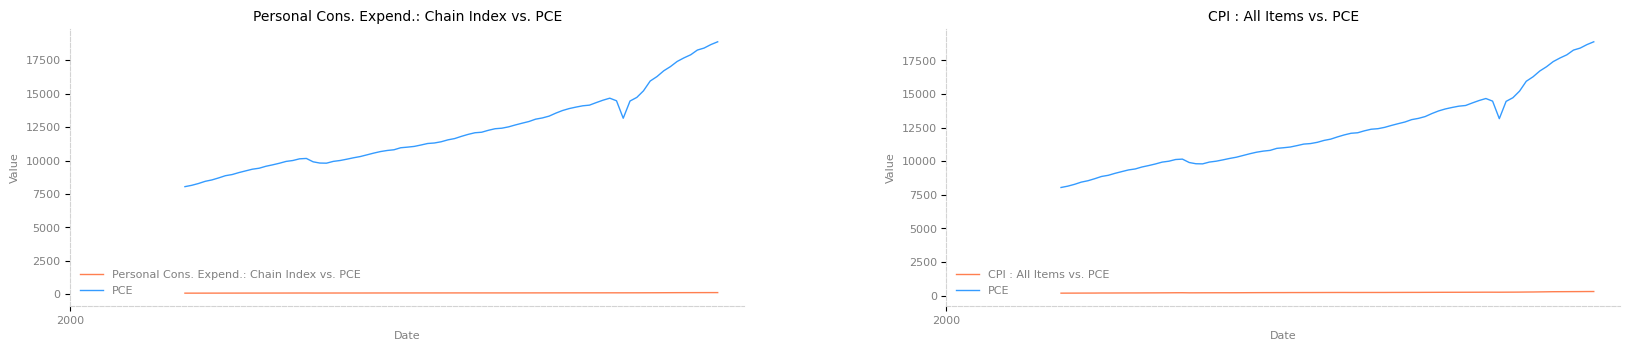

In [36]:
from visualisations.top_indicators_against_pce_line_graph import top_indicators_against_pce_line_graph

# Calculate the Spearman's rank correlation with the private consumption expenditure,
correlation_matrix = joined_dataset.corr(method="spearman")

# target_correlations will have the Spearman's rank correlation coefficients
target_correlations = correlation_matrix["PCE"].sort_values(ascending=False)

top_indicators_against_pce_line_graph(joined_dataset, target_correlations,top_n=2) # top_n is the number of top indicators to plot for demonstartion purposes

<div style="color:#FF7F50">

Observations:
</div>

Analyzing top indicators alongside Personal Consumption Expenditures (PCE) reveals scale discrepancies that hinder direct comparison. These differences highlight the necessity for preprocessing to normalize scales, enhancing analysis quality for several reasons:

- **Improved Comparability:** Scale normalization or transformation enhances the comparability between indicators, enabling more precise evaluations of their relationships with PCE.

- **Sharper Insights:** Scale adjustments aid in clearer visual analysis, facilitating the detection of trends, patterns, and anomalies requiring further exploration.

- **Better Decision-Making:** Unified scaling ensures that subsequent analysis, such as correlation studies and predictive modeling, rests on a balanced dataset, promoting dependable insights for forecasting or policy-making.



<div style="color:#00BFFF">

---

##### Log and differencing Transformation on joined dataset for comparability


Log transformation is used to stabilize the variance in data that exhibits exponential growth or large fluctuations. This is especially crucial for datasets like FRED's, where certain indicators can show significant variability over time. Given the information from the FRED database and their suggested transformation types, it seems reasonable to align with their expertise and apply these transformations to the dataset. This approach will save time and ensure that the data is treated consistently with established economic analysis practices.

citation: McCracken, M.W., Ng, S., 2015; FRED-MD: A Monthly Database for Macroeconomic Research, Federal Reserve Bank of St. Louis Working Paper 2015-012. URL https://doi.org/10.20955/wp.2015.012

<div style="color:#FF7F50">

**Transformation Types (as per FRED):**
</div>

1. **No Transformation (1)**: The data is used as is, without any modification.
2. **First Difference (∆x_t) (2)**: The change from one period to the next, useful for highlighting trends.
3. **Second Difference (∆^2x_t) (3)**: The change in the first difference, often used to capture acceleration or deceleration in a series.
4. **Natural Log (log(x_t)) (4)**: Useful for stabilizing variance and making exponential growth trends linear.
5. **First Difference of Log (∆ log(x_t)) (5)**: Commonly used to convert data into a stationary series, representing percentage change.
6. **Second Difference of Log (∆^2 log(x_t)) (6)**: The change in the first difference of the log, similar to the second difference but for logged data.
7. **Percentage Change from Prior Period (∆(x*t/x_t*−_1 − 1.0)) (7)**: This calculates the percentage change from the previous period, emphasizing relative changes.

<div style="color:#FF7F50">

**Approach:**

</div>

- **Apply Transformations:** Apply FRED Transformations and use the transformation codes provided in the `fred_indicator_mappings` dataset to transform the corresponding series in `joined_dataset`.
- This approach should streamline our analysis process and align with the methodology with FRED's established practices.
- Additionally, it ensures that the data is treated in a manner that is suitable for economic analysis.
- **FRED Logarithmic Key Mapping:** We will map the transformation codes in the FREDmd_defn dataset to our dataset's indicators and then perform the necessary transformations.


In [37]:

#  transformation function to handle the time column and a special case for PCE
def modified_log_transform(
    column, time_column, transformation_code=4, column_name=None
):
    """
    Applies the specified transformation to a Pandas Series, considering the time column and special cases.
    """
    time_column = time_column.astype(str)
    # Special instruction for the PCE column
    if column_name in ("PCE"):
        transformation_code = 5

    # Check if the data is quarterly based on the time column
    mult = 4 if any(time_column.str.endswith(("Q1", "Q2", "Q3", "Q4"))) else 1

    if transformation_code == 1:
        # No transformation -> Mathematical Equation: x(t)
        # It leaves the data in its original form, without any alteration.
        print(f"No transformation applied to column '{column_name}'")
        return column

    elif transformation_code == 2:
        # First Difference -> Mathematical Equation: x(t) - x(t-1)
        # It measures the absolute change from one period to the next, helping to detrend the data.
        print(f"Applying first difference to column '{column_name}'")
        return column.diff()

    elif transformation_code == 3:
        # Second Difference -> Mathematical Equation: (x(t) - x(t-1)) - (x(t-1) - x(t-2))
        # It measures the change in the first difference, capturing the acceleration or deceleration in the data's movement.
        print(f"Applying second difference to column '{column_name}'")
        return column.diff().diff()

    elif transformation_code == 4:
        # Log Transformation -> Mathematical Equation: ln(x(t))
        # It stabilizes the variance across the data series and can help make a skewed distribution more normal.
        print(f"Applying log transformation to column '{column_name}'")
        return np.log(column)

    elif transformation_code == 5:
        # Log First Difference -> Mathematical Equation: 100 * (ln(x(t)) - ln(x(t-1)))
        # It measures the growth rate from one period to the next and multiplies by 100 for percentage change.
        # The 'mult' variable allows for scaling the growth rate if necessary.
        print(f"Applying log first difference to column '{column_name}'")
        return np.log(column).diff() * 100 * mult

    elif transformation_code == 6:
        # Log Second Difference -> Mathematical Equation: 100 * ((ln(x(t)) - ln(x(t-1))) - (ln(x(t-1)) - ln(x(t-2))))
        # It measures the change in the growth rate (change in log first difference), capturing the momentum of change.
        # The 'mult' variable allows for scaling the change in growth rate if necessary.
        print(f"Applying log second difference to column '{column_name}'")
        return np.log(column).diff().diff() * 100 * mult

    elif transformation_code == 7:
        # Exact Percent Change -> Mathematical Equation: 100 * ((x(t)/x(t-1))^mult - 1)
        # It measures the percentage change from one period to the next, with an option to compound the change using 'mult'.
        print(f"Applying exact percent change to column '{column_name}'")
        return ((column / column.shift(1)) ** mult - 1.0) * 100

    else:
        print(f"Invalid transformation code for column '{column_name}'")
        return column


# Create a mapping of columns to transformation codes
transformation_mapping = defn.set_index("description")["tcode"].to_dict()

# Extracting the time column
time_column = joined_dataset.index

# Applying the transformations to the dataframe
transformed_dataset = joined_dataset.copy()

for column in transformed_dataset.columns:
    # Check if the column is in the mapping, else apply special instruction for PCE
    tcode = transformation_mapping.get(column, None)
    transformed_dataset[column] = modified_log_transform(
        transformed_dataset[column], time_column, tcode, column
    )

# Drop the first 5 rows containing NaN values resulting from the transformation
joined_dataset = transformed_dataset.iloc[5:]

Applying log first difference to column 'PCE'
Applying log first difference to column 'Real Personal Income'
Applying log first difference to column 'Real personal income ex transfer receipts'
Applying log first difference to column 'Real personal consumption expenditures'
Applying log first difference to column 'Real Manu. and Trade Industries Sales'
Applying log first difference to column 'Retail and Food Services Sales'
Applying log first difference to column 'IP Index'
Applying log first difference to column 'IP: Final Products and Nonindustrial Supplies'
Applying log first difference to column 'IP: Final Products (Market Group)'
Applying log first difference to column 'IP: Consumer Goods'
Applying log first difference to column 'IP: Durable Consumer Goods'
Applying log first difference to column 'IP: Nondurable Consumer Goods'
Applying log first difference to column 'IP: Business Equipment'
Applying log first difference to column 'IP: Materials'
Applying log first difference to co

In [38]:
#check for missing values after transformation
missing = report_missing_values(joined_dataset)
missing


No NaN values found.


Series([], dtype: int64)

<div style="color:#FF7F50">

**Informed Decision-Making:** 
</div>

With indicators on a unified scale, subsequent analyses, including correlation assessments and predictive modeling, will be based on a more balanced and representative dataset, leading to more reliable conclusions and informed economic forecasting or policy development.

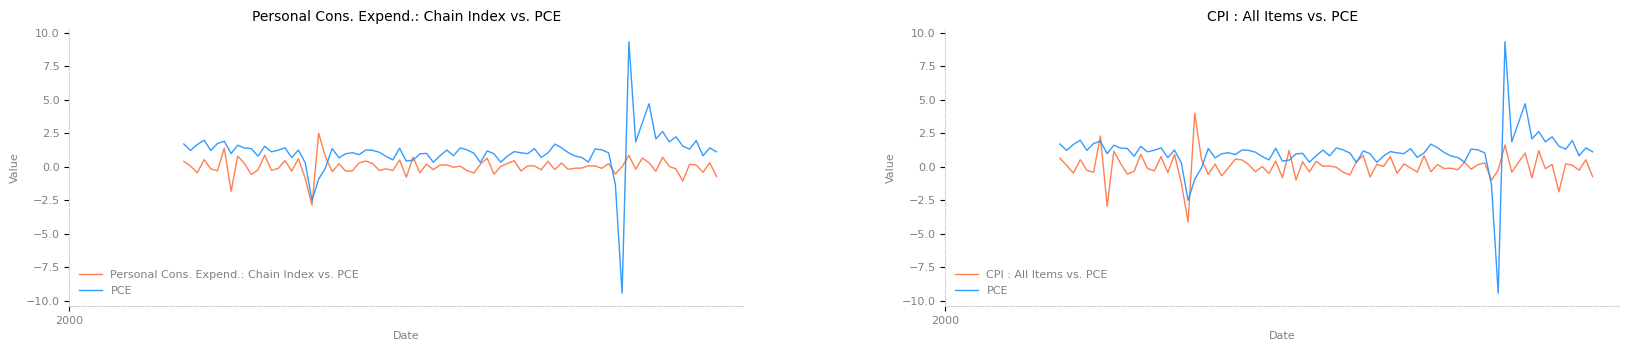

In [39]:
top_indicators_against_pce_line_graph(joined_dataset, target_correlations,top_n=2)

<div style="color:#00BFFF">

---

##### Save the final cleaned and preprocessed dataframe


In [40]:
# save the data
joined_dataset.to_csv(
    "./results/merged_data/joined_dataset_transformed.csv", index=True
)